@authors: Meghana Pagadala; James V. Talwar <br>

# Validation Analysis: MHC-I Autoimmune Alleles and Melanoma Incidence

**About:** This notebook provides the code needed to generate Figure 2 panelE from the paper [*Autoimmune Alleles at the Major Histocompatibility Locus Modify Melanoma Susceptibility*](https://www.biorxiv.org/content/10.1101/2021.08.12.456166v1.full). This analysis evaluated MHC-I autoimmune allele status in regards to melanoma incidence using the Million Veteran Program (MVP) cohort - a case (skin cutaneous melanoma) and control dataset.

*NOTE:* Logistic regression analysis (for which unit-shifted summary statistics are utilized here) was run on the MVP server.

## 1. Import Packages; Load and Format Data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import pickle
import numpy as np
import re

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
df_plot = pd.read_csv("../Data/MVP_LogReg_Results.csv", delimiter = ",") #Logistic Regression results; ugh underscores...evil
df_plot = df_plot.drop(["Unnamed: 0"], axis = 1)
df_plot

,snp,OR,OR_logreg_2.5%,OR_logreg_97.5%
0,5:33952378:G:C_G,1.303907,0.043093,0.047843
1,16:89753436:C:A_A,0.168163,0.031177,0.032355
2,9:21825075:T:C_C,0.167786,0.020312,0.020806
3,4:21889289:T:C_C,0.066152,0.109774,0.124324
4,6:22679902:G:C_C,0.050417,0.112585,0.127685
5,autoimmune,0.039340,0.031741,0.032824
6,5:1320247:G:A_A,-0.100510,0.026084,0.026711
7,11:89011046:G:A_A,-0.191249,0.030908,0.031701
8,16:89986144:C:T_T,-0.243834,0.052304,0.054458
9,20:32586748:C:T_T,-0.273826,0.045627,0.047191


## 2. Generate Figure(s)

In [3]:
snpToGeneMapping = {"5:33952378:G:C_G":"rs250417: SLC45A2", "5:1320247:G:A_A": "rs380286: TERT", "9:21825075:T:C_C":"rs7852450: CDKN2A", 
                    "16:89753436:C:A_A": "rs3794638: CDK10", "4:21889289:T:C_C": "rs75286671: KCNIP4", "20:32586748:C:T_T": "rs6088372: ASIP", 
                    "16:89986144:C:T_T":"rs1805008: MC1R", "11:89011046:G:A_A" : "rs1393350: TYR", "6:22679902:G:C_C" : "rs139791480: AL033539.18", 
                    "16:89846677:G:C_C":"rs75570604: MC1R", "autoimmune" : "Has AI Allele: MHC-I"}

['rs250417: SLC45A2', 'rs3794638: CDK10', 'rs7852450: CDKN2A', 'rs75286671: KCNIP4', 'rs139791480: AL033539.18', 'Has AI Allele: MHC-I', 'rs380286: TERT', 'rs1393350: TYR', 'rs1805008: MC1R', 'rs6088372: ASIP', 'rs75570604: MC1R']


/cellar/users/jtalwar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


<ErrorbarContainer object of 3 artists>

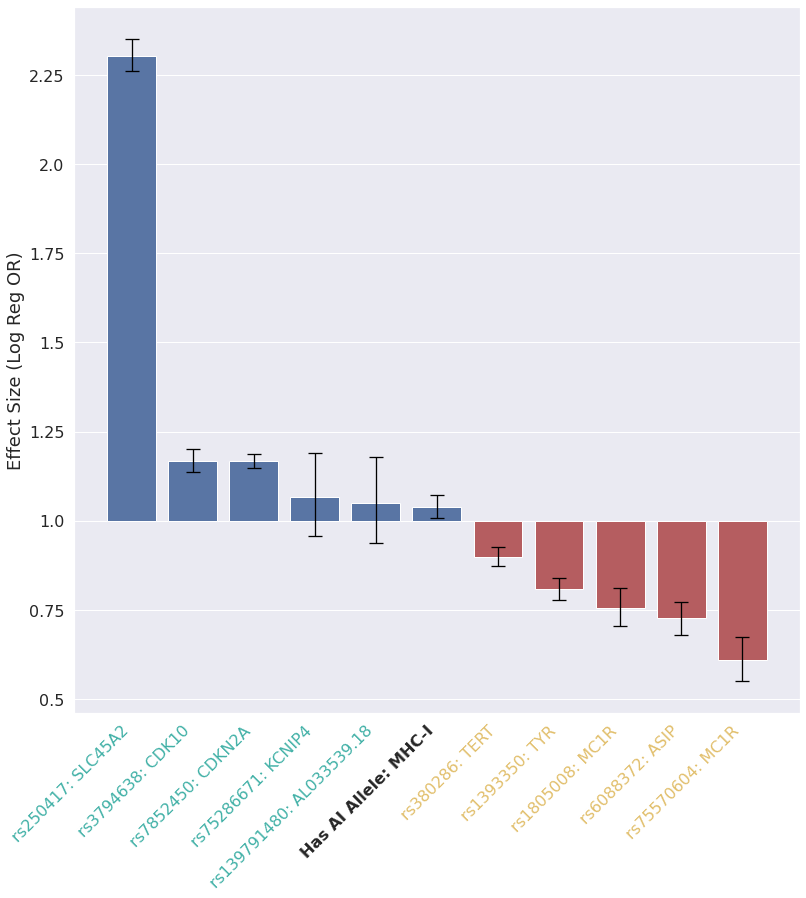

In [4]:
sns.set(font_scale = 1.1)
fig, ax = plt.subplots(figsize = (13, 13))

sns.barplot(data = df_plot, x = "snp", y = "OR", palette = ["b" if v > 0 else "r" for v in df_plot["OR"]])
plt.xlabel("", fontsize = 18)
plt.ylabel("Effect Size (Log Reg OR)", fontsize = 18)
plt.xticks(rotation = 45, fontsize = 16, ha = "right")
plt.yticks(fontsize = 16)


plt.draw() #This is needed so the y-tick labels are populated...
newLabels = [snpToGeneMapping[item.get_text()] for item in ax.get_xticklabels()]
prs = pd.read_csv("../Data/Gu_Melanoma_PRS/PRS_Weights_MVP_Variant_Mapping.tsv", sep = "\t", index_col = 0) 
predisposingSNPResults=prs[prs["Weight#"]>0]["variant"].tolist()
protectiveSNPResults=prs[prs["Weight#"]<0]["variant"].tolist()

for i in range(len(ax.get_xticklabels())):
	xLabel = ax.get_xticklabels()[i].get_text().rsplit(":",2)[0]
	if len(prs[prs["variant"].str.contains(xLabel)]) == 0:
		ax.get_xticklabels()[i].set_fontweight("bold")
	elif xLabel in [x.rsplit(":",2)[0] for x in predisposingSNPResults]:
		ax.get_xticklabels()[i].set_color("#E1BE6A") #red
	elif xLabel in [x.rsplit(":",2)[0] for x in protectiveSNPResults]:
		ax.get_xticklabels()[i].set_color("#40B0A6") #green 

print(newLabels)
ax.set_xticklabels(newLabels) #rewrite with the SNP and the map to it's corresponding/closest gene


yticks=[]
for i in range(len(ax.get_yticklabels())):
    yLabel = ax.get_yticklabels()[i].get_text()    
    yLabel = re.sub(r'[^\x00-\x7F]+','-', yLabel)
    yticks.append(float(yLabel)+0.75)
ax.set_yticklabels(yticks)

    
plt.errorbar(newLabels, df_plot["OR"], yerr = [df_plot["OR_logreg_2.5%"], df_plot["OR_logreg_97.5%"]], fmt = "none", color = "black", ecolor = "black", 
             elinewidth = 1.3, capsize = 7, capthick = 1.3)